<a href="https://colab.research.google.com/github/Yeen000/Aiffel/blob/master/2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
!pip install koreanize-matplotlib

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
# Ïó¨Í∏∞ÏÑú ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏïÑÏÑú Ï£ºÏÑùÏ≤òÎ¶¨
# ais = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IM/aisles.csv")
# dep = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/departments.csv")
# oprior = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/order_products__prior.csv")
# otrain = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/order_products__train.csv")
# ord = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/orders.csv")
# prod = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/products.csv")

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
# print("Aisles\n", ais.head(), "\n")
# print("Departments\n", dep.head(), "\n")
# print("Order Prior\n", oprior.head(), "\n")
# print("Order Train\n", otrain.head(), "\n")
# print("Orders\n", ord.head(), "\n")
# print("Products\n", prod.head(), "\n")

In [ ]:
# Ï∂îÍ∞ÄÎêú ÌÖåÏù¥Î∏î
u_pord = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IM/u_prod.csv") #Í∞ÄÍ≤©Ï†ïÎ≥¥ÏÉùÏÑ±ÌÖåÏù¥Î∏î
f_orders = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IM/f_orders.csv") #ÏµúÏ¢Ö orders ÌÖåÏù¥Î∏î
users = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IM/users.csv") #user ÌÖåÏù¥Î∏î

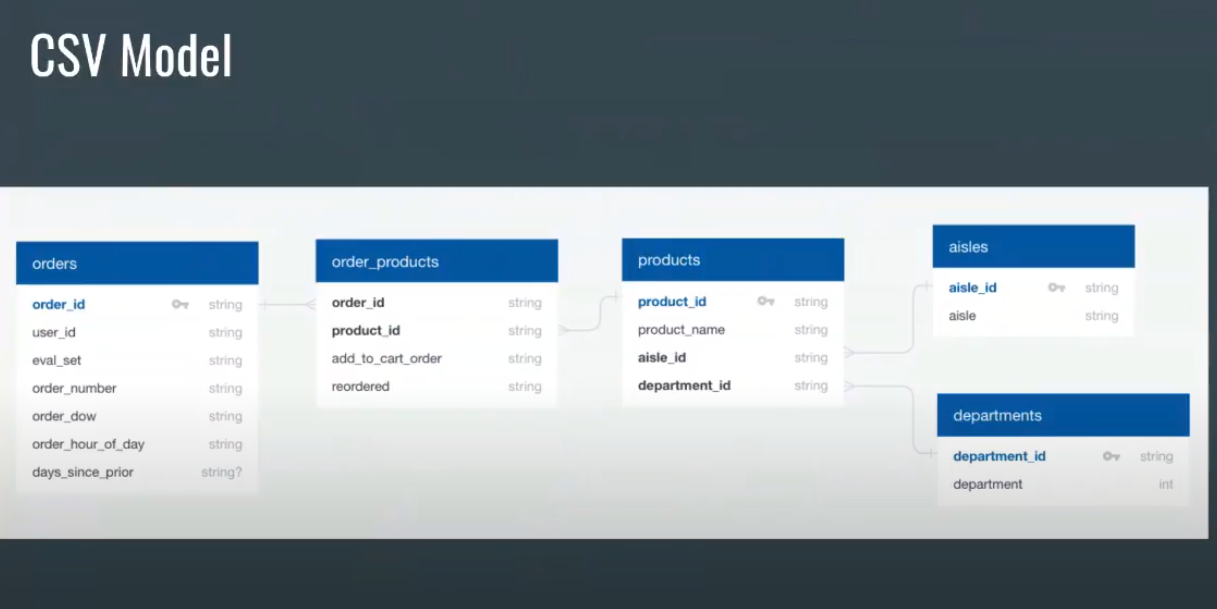

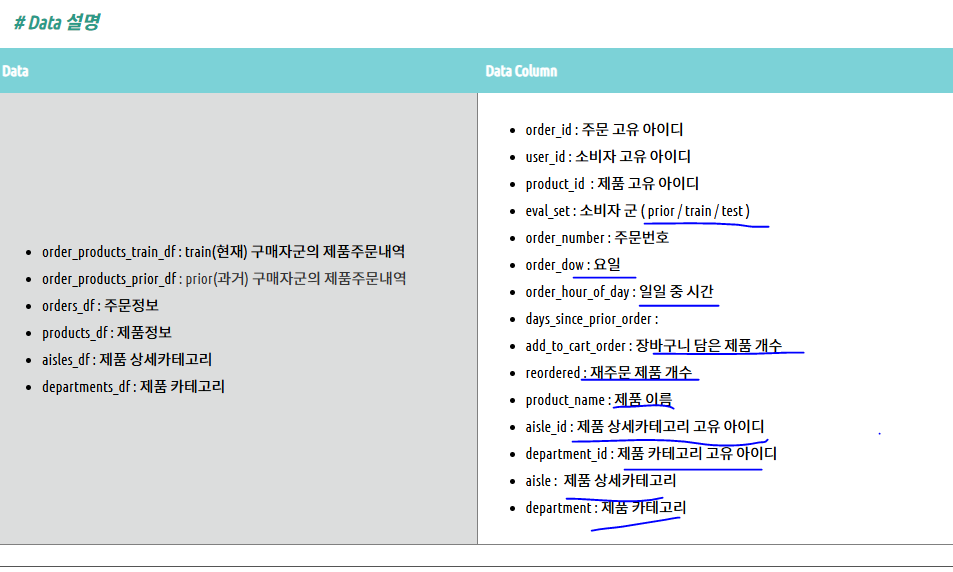

In [ ]:
users.head()

user_id  total_reorder_count  avg_cart_order_cnt  avg_reorder_cnt  \
0        1                   10            6.363636         4.636364   
1        2                   13           15.066667         7.000000   
2        3                   11            7.333333         4.583333   
3        4                    1            3.600000         0.200000   
4        5                    4            9.200000         3.600000   

   avg_reorder_price  avg_days_since_prior_order  recency  frequency  \
0          38.622727                   17.272727     30.0         11   
1          92.113333                   15.200000     30.0         15   
2          69.029167                   11.083333     21.0         12   
3           3.518000                   11.000000     21.0          5   
4          54.768000                    9.200000     19.0          5   

    monetary  
0  16.638182  
1  40.797333  
2  39.950833  
3  75.114000  
4  31.908000

#### USER ÌÖåÏù¥Î∏î Ïª¨Îüº Ìï¥ÏÑù
user_id	: ÏÇ¨Ïö©Ïûê ID  
total_reorder_count	: Ï¥ù Ïû¨Íµ¨Îß§ Î∞úÏÉù ÌöüÏàò  
avg_cart_order_cnt	: ÌèâÍ∑† Ïû•Î∞îÍµ¨Îãà ÌÅ¨Í∏∞ (ÌíàÎ™© Ïàò)  
avg_reorder_cnt	: ÌèâÍ∑† Ïû¨Íµ¨Îß§ ÌíàÎ™© Ïàò  
avg_reorder_price	: ÌèâÍ∑† Ïû¨Íµ¨Îß§ Í∞ÄÍ≤©  
avg_days_since_prior_order :	ÌèâÍ∑† Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞ (Ïù¥Ï†Ñ Ï£ºÎ¨∏ ÌõÑ ÌèâÍ∑† Í≤ΩÍ≥º ÏùºÏàò)  
recency	: Í∞ÄÏû• ÏµúÍ∑º Íµ¨Îß§ Ïù¥ÌõÑ ÏßÄÎÇú ÏùºÏàò  
frequency	: Ï¥ù Ï£ºÎ¨∏ ÌöüÏàò    
monetary	: ÌèâÍ∑† Íµ¨Îß§ Í∞ÄÍ≤© (Í±∞Îûò Í∏àÏï°)  

# F_ORDERS Í∏∞Ï§Ä EDA  
  
-  Ïª¨ÎüºÌï¥ÏÑù
order_id : Ï£ºÎ¨∏ Í≥†Ïú† ÏïÑÏù¥Îîî  
user_id :	ÏÜåÎπÑÏûê Í≥†Ïú† ÏïÑÏù¥Îîî  
eval_set :	ÏÜåÎπÑÏûê Íµ∞ (prior / train / test)  
order_number	Ï£ºÎ¨∏Î≤àÌò∏  
order_dow	: ÏöîÏùº  
order_hour_of_day :	ÏùºÏùº Ï§ë ÏãúÍ∞Ñ  
days_since_prior_order	: Ïù¥Ï†Ñ Ï£ºÎ¨∏ ÌõÑ Í≤ΩÍ≥º ÏùºÏàò  
cart_order_cnt	: Ïû•Î∞îÍµ¨ÎãàÏóê Îã¥ÏùÄ Ï†úÌíà Í∞úÏàò  
reorder_cnt	: Ïû¨Íµ¨Îß§ ÌíàÎ™© Ïàò  
total_price :	Ï¥ù Í±∞Îûò Í∏àÏï°  
max_price	: Í∞ÄÏû• ÎÜíÏùÄ Ï†úÌíà Í∞ÄÍ≤©  
total_reordered_price	: Ï¥ù Ïû¨Íµ¨Îß§ Í∞ÄÍ≤©  
is_reorder	: Ïû¨Íµ¨Îß§ Ïó¨Î∂Ä (1: Ïû¨Íµ¨Îß§, 0: Ïã†Í∑úÍµ¨Îß§)  

In [ ]:
f_orders.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  cart_order_cnt  reorder_cnt  total_price  \
0                     0.0               5            0        12.06   
1                    15.0               6            3        35.37   
2                    21.0               5            3        12.06   
3                    29.0               5            5        12.06   
4                    28.0               8            5        35.37   

   max_price  total_reordered_price  is_reorder  
0      42.11                   0.00           0  
1      75.12                  32.72           1  
2      39.80                  23.54           1  
3      36.71                  36.71           1  
4     106.09                  66.59           1

## Í∞ÄÏÑ§1 -  ÏöîÏùºÎ≥Ñ Ï£ºÎ¨∏Ìå®ÌÑ¥ (Ï£ºÎ¨∏ÎπàÎèÑ)ÏóêÎäî Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Í≤ÉÏù¥Îã§.

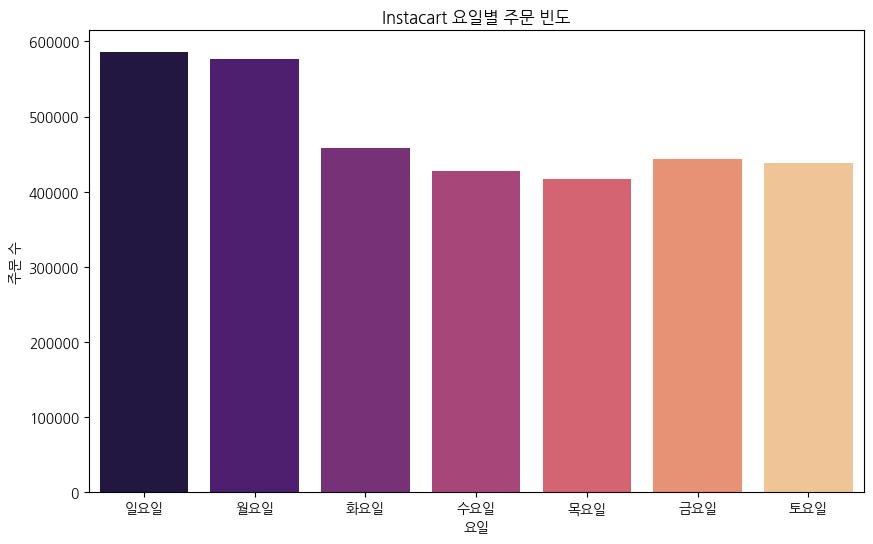

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x=f_orders['order_dow'], palette="magma")

# ÏöîÏùº ÎùºÎ≤® ÏÑ§Ï†ï
plt.xticks(ticks=range(7), labels=["ÏùºÏöîÏùº", "ÏõîÏöîÏùº", "ÌôîÏöîÏùº", "ÏàòÏöîÏùº", "Î™©ÏöîÏùº", "Í∏àÏöîÏùº", "ÌÜ†ÏöîÏùº"])

plt.xlabel("ÏöîÏùº")
plt.ylabel("Ï£ºÎ¨∏ Ïàò")
plt.title("Instacart ÏöîÏùºÎ≥Ñ Ï£ºÎ¨∏ ÎπàÎèÑ")
plt.show()

In [ ]:
# Ïã¨ÌôîÎ∂ÑÏÑù
import pandas as pd
import numpy as np
import scipy.stats as stats

# 1Ô∏è‚É£ Í∏∞Î≥∏ ÌÜµÍ≥Ñ Î∂ÑÏÑù
def analyze_order_stats(f_orders):
    # ÏöîÏùºÎ≥Ñ Ï£ºÎ¨∏ Ïàò ÏßëÍ≥Ñ
    weekday_orders = f_orders.groupby("order_dow")["order_id"].count()

    # Í∏∞Î≥∏ ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
    stats_summary = weekday_orders.describe()

    # Î≤îÏúÑ(range) Î∞è ÏÇ¨Î∂ÑÏúÑÏàò Í≥ÑÏÇ∞
    stats_summary["range"] = stats_summary["max"] - stats_summary["min"]
    stats_summary["25%"] = weekday_orders.quantile(0.25)
    stats_summary["50% (median)"] = weekday_orders.median()
    stats_summary["75%"] = weekday_orders.quantile(0.75)

    return stats_summary

# 2Ô∏è‚É£ ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ìå®ÌÑ¥ Î∂ÑÏÑù
def analyze_purchase_patterns(f_orders, users):
    # ÏöîÏùºÎ≥Ñ ÌèâÍ∑† Ïû¨Íµ¨Îß§Ïú® (is_reorder ÌèâÍ∑†)
    reorder_rates = f_orders.groupby("order_dow")["is_reorder"].mean().reset_index()
    reorder_rates.columns = ["order_dow", "avg_reorder_rate"]

    # ÏöîÏùºÎ≥Ñ ÌèâÍ∑† Íµ¨Îß§ Í∞ÄÍ≤© (monetary ÌèâÍ∑†)
    monetary_avg = f_orders.groupby("order_dow")["total_price"].mean().reset_index()
    monetary_avg.columns = ["order_dow", "avg_monetary"]

    # Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
    purchase_patterns = pd.merge(reorder_rates, monetary_avg, on="order_dow")
    return purchase_patterns

# 3Ô∏è‚É£ ANOVA (ÏöîÏùºÎ≥Ñ Íµ¨Îß§ ÌöüÏàò Ï∞®Ïù¥ Í≤ÄÏ†ï)
def perform_anova(f_orders):
    # ÏöîÏùºÎ≥Ñ Ï£ºÎ¨∏ Îç∞Ïù¥ÌÑ∞ Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
    order_counts_by_day = [
        f_orders[f_orders["order_dow"] == dow]["order_id"].count() for dow in range(7)
    ]

    # ANOVA Í≤ÄÏ†ï ÏàòÌñâ
    anova_result = stats.f_oneway(*order_counts_by_day)

    return {"F-statistic": anova_result.statistic, "p-value": anova_result.pvalue}

In [ ]:
# 1Ô∏è‚É£ Í∏∞Î≥∏ ÌÜµÍ≥Ñ Î∂ÑÏÑù Ïã§Ìñâ
order_stats = analyze_order_stats(f_orders)
print("üìä ÏöîÏùºÎ≥Ñ Ï£ºÎ¨∏ Ïàò Í∏∞Î≥∏ ÌÜµÍ≥Ñ Î∂ÑÏÑù:\n", order_stats)

# 2Ô∏è‚É£ ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ìå®ÌÑ¥ Î∂ÑÏÑù Ïã§Ìñâ
purchase_patterns = analyze_purchase_patterns(f_orders, users)
print("\nüìà ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ìå®ÌÑ¥ Î∂ÑÏÑù:\n", purchase_patterns)

üìä ÏöîÏùºÎ≥Ñ Ï£ºÎ¨∏ Ïàò Í∏∞Î≥∏ ÌÜµÍ≥Ñ Î∂ÑÏÑù:
 count                7.000000
mean            478011.857143
std              71396.149692
min             417171.000000
25%             432918.000000
50%             443388.000000
75%             517225.500000
max             585237.000000
range           168066.000000
50% (median)    443388.000000
Name: order_id, dtype: float64

üìà ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ìå®ÌÑ¥ Î∂ÑÏÑù:
    order_dow  avg_reorder_rate  avg_monetary
0          0          0.889218     36.417374
1          1          0.886465     35.286239
2          2          0.876428     34.515663
3          3          0.873813     34.572641
4          4          0.875869     35.122058
5          5          0.881305     35.897262
6          6          0.881654     36.485047


In [ ]:
# 3Ô∏è‚É£ ANOVA Î∂ÑÏÑù Ïã§Ìñâ
import numpy as np
from scipy.stats import f_oneway

# ÏöîÏùºÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Í∑∏Î£πÌôî (ÏöîÏùº ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨)
grouped_data = f_orders.groupby('order_dow')['order_id'].apply(list)
grouped_data = grouped_data.reindex(np.arange(7))  # 0~6 ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨

# ANOVA Ïã§Ìñâ (Í≤∞Ï∏°Í∞íÏù¥ ÏûàÏúºÎ©¥ ÏûêÎèô Ï†úÍ±∞)
anova_result = f_oneway(*grouped_data.dropna())

# Í≤∞Í≥º Ï∂úÎ†•
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

F-statistic: 1.2592358471891836, p-value: 0.2725166525824301


üéØ ANOVA Í≤∞Í≥º Ìï¥ÏÑù  
	‚Ä¢	F-statistic: 1.259 ‚Üí ÏöîÏùºÎ≥Ñ Ï£ºÎ¨∏ Ïàò Ï∞®Ïù¥Í∞Ä ÏûàÍ∏¥ ÌïòÏßÄÎßå ÌÅ¨ÏßÄ ÏïäÏùå  
	‚Ä¢	p-value: 0.2725 ‚Üí Ïú†ÏùòÏàòÏ§Ä(0.05)Î≥¥Îã§ ÌÅº ‚Üí ÏöîÏùºÎ≥Ñ Ï£ºÎ¨∏ Ïàò Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÏßÄ ÏïäÏùå  

  ### Ï∂îÍ∞ÄÍ∞ÄÏÑ§ : Í∑∏Î†áÎã§Î©¥ Ï£ºÎßê vs ÌèâÏùºÏùÄ Ïú†ÏùòÎØ∏Ìïú Ìå®ÌÑ¥ Ï∞®Ïù¥Í∞Ä ÏûàÏùÑÍπå?

In [ ]:
# Ï£ºÎßê (ÌÜ†,Ïùº) vs ÌèâÏùº(Ïõî~Í∏à)ÏúºÎ°ú ÎÇòÎà†ÏÑú Îã§Ïãú Î∂ÑÏÑù
f_orders['weekend'] = f_orders['order_dow'].apply(lambda x: 1 if x in [0, 6] else 0)
from scipy.stats import ttest_ind

weekend_orders = f_orders[f_orders['weekend'] == 1]['order_id']
weekday_orders = f_orders[f_orders['weekend'] == 0]['order_id']

ttest_result = ttest_ind(weekend_orders, weekday_orders, equal_var=False)
print(f"T-statistic: {ttest_result.statistic}, p-value: {ttest_result.pvalue}")

T-statistic: 0.6520475636575154, p-value: 0.5143705659557856


P-valueÍ∞Ä Îçî ÎÜíÏïÑÏßê  
Í≤∞Î°†: Ïã§Ï†úÎ°ú Ï£ºÎßêÍ≥º ÌèâÏùºÏùò Ï∞®Ïù¥Í∞Ä ÌÅ¨ÏßÄ ÏïäÏùå (Ïú†ÏùòÎØ∏Ìïú Ìå®ÌÑ¥Ïù¥ ÏïÑÎãàÎã§)  
	‚Ä¢	ÏòàÎ•º Îì§Ïñ¥, ÏÇ¨ÎûåÎì§Ïù¥ ÌäπÏ†ï ÏöîÏùº(Ï£ºÎßêÏù¥ÎÇò ÏõîÏöîÏùº Îì±)Ïóê Î™∞Î†§ÏÑú Ïû•ÏùÑ Î≥¥Îäî Í≤å ÏïÑÎãàÎùº, ÏùºÏ†ïÌïú Ï£ºÍ∏∞Î°ú Ï£ºÎ¨∏ÌïòÎäî Í≤ΩÏö∞ Ïù¥Îü∞ Í≤∞Í≥ºÍ∞Ä ÎÇòÏò¨ Ïàò ÏûàÎã§.  
	‚Ä¢	ÌäπÌûà Ïò®ÎùºÏù∏ Ïû•Î≥¥Í∏∞ ÏÑúÎπÑÏä§Îäî Ïò§ÌîÑÎùºÏù∏ ÎßàÌä∏Î≥¥Îã§ ÏöîÏùºÎ≥Ñ Î≥ÄÎèôÏù¥ Ï†ÅÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§.  

### [ 1Î≤à Í∞ÄÏÑ§ Í∏∞Í∞Å ]

## Í∞ÄÏÑ§ 2 - ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏Î∂ÑÌè¨(Ï£ºÎ¨∏Ïàò) ÏóêÎäî Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Í≤ÉÏù¥Îã§.  

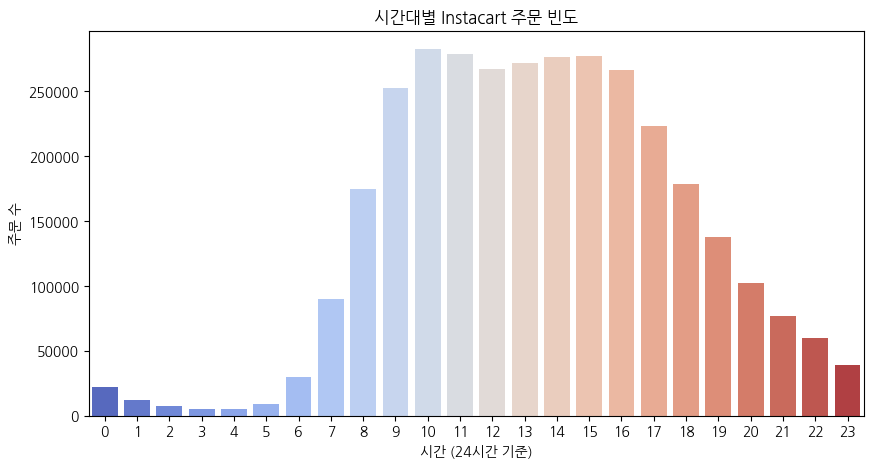

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x=f_orders['order_hour_of_day'], palette="coolwarm")

plt.xlabel("ÏãúÍ∞Ñ (24ÏãúÍ∞Ñ Í∏∞Ï§Ä)")
plt.ylabel("Ï£ºÎ¨∏ Ïàò")
plt.title("ÏãúÍ∞ÑÎåÄÎ≥Ñ Instacart Ï£ºÎ¨∏ ÎπàÎèÑ")
plt.xticks(range(0, 24))  # 0~23ÏãúÍ∞Ñ
plt.show()

‚úÖ 1. Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï (Chi-Square Goodness-of-Fit Test)

Ïù¥ Í≤ÄÏ†ïÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ÎüâÏù¥ ÎûúÎç§(Í∑†Îì±)ÌïòÍ≤å Î∞úÏÉùÌïòÎäîÏßÄ, ÏïÑÎãàÎ©¥ ÌäπÏ†ï Ìå®ÌÑ¥Ïù¥ ÏûàÎäîÏßÄ ÌôïÏù∏ Í∞ÄÎä•   

üìå Í≤ÄÏ†ï Í∞ÄÏÑ§  
	‚Ä¢	H‚ÇÄ(Í∑ÄÎ¨¥Í∞ÄÏÑ§): Ï£ºÎ¨∏ÎüâÏù¥ Î™®Îì† ÏãúÍ∞ÑÎåÄÏóê Í∑†Îì±ÌïòÍ≤å Î∞úÏÉùÌïúÎã§.  
	‚Ä¢	H‚ÇÅ(ÎåÄÎ¶ΩÍ∞ÄÏÑ§): ÌäπÏ†ï ÏãúÍ∞ÑÎåÄÏóê Ï£ºÎ¨∏Ïù¥ Î™∞Î¶¨Îäî Ìå®ÌÑ¥Ïù¥ ÏûàÎã§.  

  Ï£ºÏùò: Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ïÏóêÏÑúÎäî Ïã§Ï†ú Í∞í(Observed)Í≥º Í∏∞ÎåÄ Í∞í(Expected)Ïùò Ï¥ùÌï©Ïù¥ Ï†ïÌôïÌûà Í∞ôÏïÑÏïº ÌïòÎØÄÎ°ú, Í∏∞ÎåÄÍ∞íÏùÑ Î≥¥Ï†ïÌï¥ Ï£ºÏñ¥Ïïº Ìï®  


In [ ]:
import numpy as np
import scipy.stats as stats

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Ïàò ÏßëÍ≥Ñ
order_counts = f_orders['order_hour_of_day'].value_counts().sort_index()

# Í∏∞ÎåÄÍ∞í: Î™®Îì† ÏãúÍ∞ÑÎåÄÏóê ÎèôÏùºÌïú Ï£ºÎ¨∏ÎüâÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïú Í≤ΩÏö∞ (Í∑†Îì±Î∂ÑÌè¨)
expected_counts = np.full_like(order_counts, order_counts.mean())

# Í∏∞ÎåÄÍ∞íÏùÑ Ïã§Ï†ú Ï£ºÎ¨∏ Ï¥ùÌï©Í≥º ÎèôÏùºÌïòÍ≤å Ïä§ÏºÄÏùº Ï°∞Ï†ï
expected_counts = expected_counts * (order_counts.sum() / expected_counts.sum())

# Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Ïã§Ìñâ
chi2_stat, p_value = stats.chisquare(order_counts, expected_counts)

print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_value}")

Chi-Square Statistic: 2055569.3544287456, p-value: 0.0


üéØ Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Í≤∞Í≥º Ìï¥ÏÑù  
	‚Ä¢	Chi-Square Statistic: 2,055,569 ‚Üí Îß§Ïö∞ ÌÅ∞ Í∞í  
	‚Ä¢	p-value: 0.0 (Ï¶â, 0Ïóê ÏàòÎ†¥) ‚úÖ  

‚û°Ô∏è ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Î∂ÑÌè¨Îäî Í∑†Îì±ÌïòÏßÄ ÏïäÏúºÎ©∞, ÌäπÏ†ï ÏãúÍ∞ÑÎåÄÏóê Î™∞Î¶¨Îäî Í≤ΩÌñ•Ïù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Îß§Ïö∞ Ïú†ÏùòÎØ∏Ìï®! üöÄ  
  

üìå Ìï¥ÏÑù  
	1.	Ï£ºÎ¨∏Ïù¥ Í∑†Îì±ÌïòÍ≤å Î∂ÑÌè¨ÌïòÏßÄ ÏïäÏùå  
	‚Ä¢	Í∑ÄÎ¨¥Í∞ÄÏÑ§(H‚ÇÄ): ‚ÄúÎ™®Îì† ÏãúÍ∞ÑÎåÄÏóê Ï£ºÎ¨∏Ïù¥ Í∑†Îì±ÌïòÍ≤å Î∞úÏÉùÌïúÎã§‚Äù ‚Üí Í∏∞Í∞ÅÎê®!  
	‚Ä¢	Ï¶â, InstacartÏóêÏÑú ÌäπÏ†ï ÏãúÍ∞ÑÎåÄÏóê Ï£ºÎ¨∏Ïù¥ Î™∞Î¶¨Îäî Ìå®ÌÑ¥Ïù¥ Î™ÖÌôïÌïòÍ≤å Ï°¥Ïû¨Ìï®.  
	2.	Ïñ¥Îñ§ ÏãúÍ∞ÑÎåÄÏóê Ï£ºÎ¨∏Ïù¥ Î™∞Î¶¨ÎäîÏßÄ ÌôïÏù∏ ÌïÑÏöî  
	‚Ä¢	Í∏∞Ï°¥Ïóê ÏãúÍ∞ÅÌôîÌïú ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏Îüâ Í∑∏ÎûòÌîÑÎ•º Î≥¥Î©¥,Ïò§Ï†Ñ 9-17Ïãú ÏÇ¨Ïù¥Ïóê Ï£ºÎ¨∏Ïù¥ ÏßëÏ§ëÎêòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏñ¥.  
	‚Ä¢	Î∞òÎåÄÎ°ú ÏÉàÎ≤Ω(0~6Ïãú)ÏôÄ Î∞§(21Ïãú Ïù¥ÌõÑ)ÏùÄ Ï£ºÎ¨∏Ïù¥ Ï†ÅÏùå.  

### Ï∂îÍ∞ÄÍ∞ÄÏÑ§ - Ï£ºÎßêÍ≥º ÌèâÏùºÏùò ÏãúÍ∞ÑÎ≥Ñ Ï£ºÎ¨∏ Ìå®ÌÑ¥Ïù¥ Îã§Î•ºÍπå?

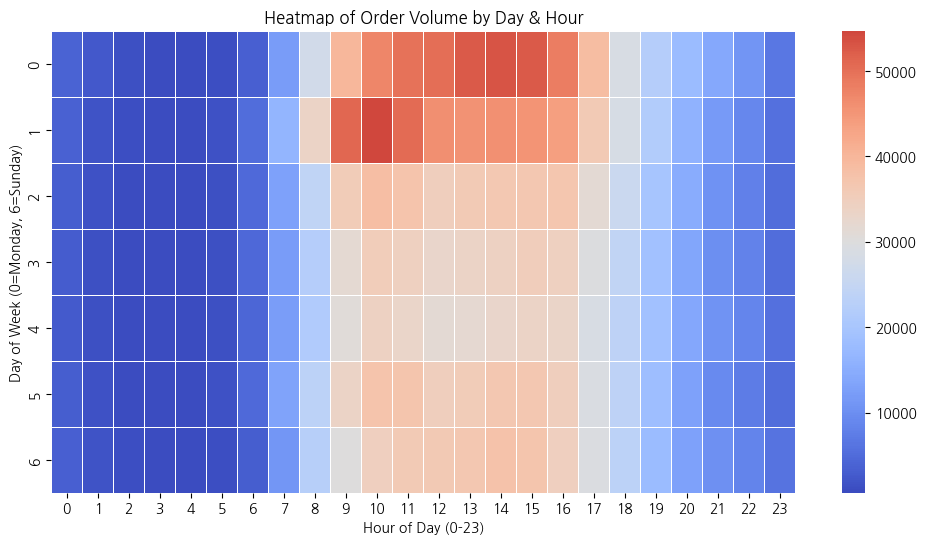

In [ ]:
# ÏöîÏùº & ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏Îüâ ÌûàÌä∏ÎßµÏúºÎ°ú ÏãúÍ∞ÅÌôî

# ÏöîÏùº, ÏãúÍ∞ÑÎ≥ÑÎ°ú Î¨∂Ïñ¥ÏÑú Ï£ºÎ¨∏ Ïàò(count) Í≥ÑÏÇ∞
grouped = f_orders.groupby(['order_dow', 'order_hour_of_day'])["order_id"].count().reset_index()

# pivot ÌÖåÏù¥Î∏î ÏÉùÏÑ± (ÏöîÏùºÏùÑ Ìñâ, ÏãúÍ∞ÑÏùÑ Ïó¥Î°ú ÏÑ§Ï†ï)
grouped_pivot = grouped.pivot(index='order_dow', columns='order_hour_of_day', values='order_id')
grouped_pivot

# Ï£ºÎ¨∏Îüâ ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_pivot, cmap="coolwarm", center=30000, annot=False, linewidths=0.5)

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è ÎùºÎ≤® ÏÑ§Ï†ï
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Day of Week (0=Monday, 6=Sunday)")
plt.title("Heatmap of Order Volume by Day & Hour")

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

# ÏãúÍ∞ÑÎåÄÎäî 9Ïãú ~ 16ÏãúÍ∞Ä Í∞ÄÏû• ÎÜíÏúºÎ©∞
# ÏöîÏùºÏùÄ Ïõî, Ìôî

# ÌäπÌûà ÏõîÏùÄ Ïò§ÌõÑ 1Ïãú~3Ïãú/ ÌôîÎäî Ïò§Ï†Ñ 10ÏãúÍ∞Ä Í∞ÄÏû• ÎÜíÏùå

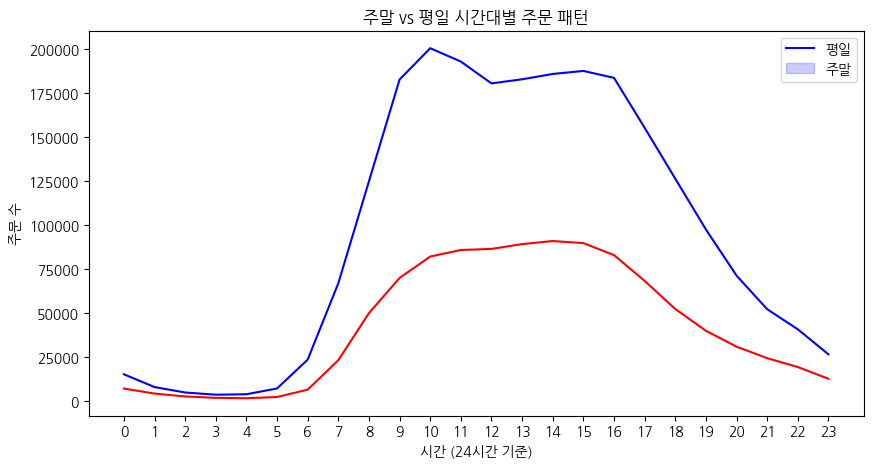

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ï£ºÎßê & ÌèâÏùº Íµ¨Î∂Ñ
f_orders["weekend"] = f_orders["order_dow"].apply(lambda x: 1 if x in [0, 6] else 0)

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Ïàò ÏßëÍ≥Ñ
order_counts = f_orders.groupby(["order_hour_of_day", "weekend"])["order_id"].count().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,5))

sns.lineplot(data=order_counts, x="order_hour_of_day", y="order_id", hue="weekend", palette=["blue", "red"])

plt.xlabel("ÏãúÍ∞Ñ (24ÏãúÍ∞Ñ Í∏∞Ï§Ä)")
plt.ylabel("Ï£ºÎ¨∏ Ïàò")
plt.title("Ï£ºÎßê vs ÌèâÏùº ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Ìå®ÌÑ¥")
plt.xticks(range(0, 24))
plt.legend(labels=["ÌèâÏùº", "Ï£ºÎßê"])
plt.show()

* Ìï¥ÏÑù
- ÌèâÏùº Ï£ºÎ¨∏ÎüâÏù¥ Ìõ®Ïî¨ ÎßéÎã§ (ÌäπÌûà Ïò§Ï†Ñ 0Ïãú~17Ïãú)
- Ï£ºÎßêÏùÄ Ï£ºÎ¨∏ÎüâÏù¥ ÎÇÆÍ≥† ÏôÑÎßåÌïú Í≥°ÏÑ†ÏùÑ Í∑∏Î¶º (ÌäπÏ†ï ÏãúÍ∞ÑÏóê ÏïàÎ™∞Î¶º)

In [ ]:
# TÍ≤ÄÏ†ïÏúºÎ°ú ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÎØ∏ÌïúÏßÄ Í≤ÄÏ†ïÌï®

# Ï£ºÎßêÍ≥º ÌèâÏùº Îç∞Ïù¥ÌÑ∞Î•º ÏãúÍ∞ÑÎåÄÎ≥ÑÎ°ú Í∑∏Î£πÌôî
weekend_orders = f_orders[f_orders["weekend"] == 1].groupby("order_hour_of_day")["order_id"].count().values
weekday_orders = f_orders[f_orders["weekend"] == 0].groupby("order_hour_of_day")["order_id"].count().values

# Îëê Í∑∏Î£πÏùò Í∏∏Ïù¥Í∞Ä Îã§Î•º Í≤ΩÏö∞ ÎßûÏ∂∞Ï£ºÍ∏∞
min_length = min(len(weekend_orders), len(weekday_orders))
weekend_orders = weekend_orders[:min_length]
weekday_orders = weekday_orders[:min_length]

# T-Í≤ÄÏ†ï ÏàòÌñâ
ttest_result = ttest_ind(weekend_orders, weekday_orders, equal_var=False)

print(f"T-statistic: {ttest_result.statistic}, p-value: {ttest_result.pvalue}")

T-statistic: -3.142659876244724, p-value: 0.0035865947669615934


üéØ T-Í≤ÄÏ†ï Í≤∞Í≥º Ìï¥ÏÑù
	‚Ä¢	T-statistic: -3.14 ‚Üí Ï£ºÎßêÍ≥º ÌèâÏùºÏùò Ï£ºÎ¨∏ Ìå®ÌÑ¥Ïóê Ï∞®Ïù¥Í∞Ä ÏûàÏùåÏùÑ ÏãúÏÇ¨  
	‚Ä¢	p-value: 0.0036 (0.05Î≥¥Îã§ ÏûëÏùå) ‚Üí Ï£ºÎßêÍ≥º ÌèâÏùºÏùò Ï£ºÎ¨∏ Ìå®ÌÑ¥ Ï∞®Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï®! ‚úÖ  

  [ 2Î≤à Í∞ÄÏÑ§ Ïù∏Ïö© ]

## Í∞ÄÏÑ§ 3 - Ï£ºÎßêÍ≥º ÌèâÍ∑† Ïû¨Íµ¨Îß§Ïú®ÏóêÎèÑ Ï∞®Ïù¥Í∞Ä ÎÇ†Íπå??

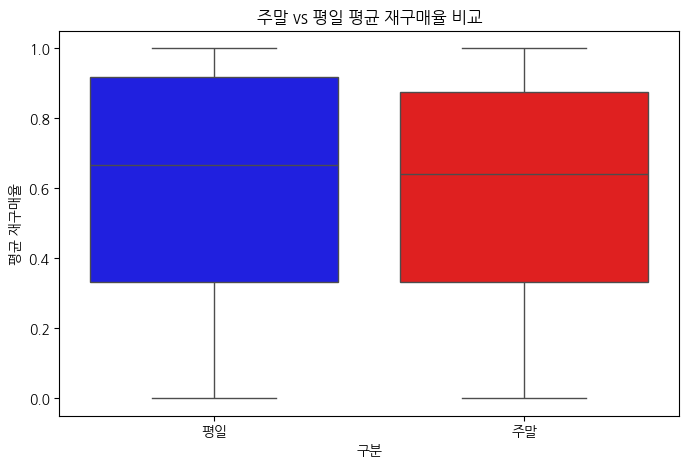

T-statistic (Ïû¨Íµ¨Îß§Ïú®): -33.29204046357758, p-value: 5.870464054155158e-243


In [ ]:


# ÌèâÍ∑† Ïû¨Íµ¨Îß§Ïú® Í≥ÑÏÇ∞ (Ìïú Ï£ºÎ¨∏ÏóêÏÑú Ïû¨Íµ¨Îß§ ÎπÑÏú®)
f_orders["avg_reorder_rate"] = f_orders["reorder_cnt"] / f_orders["cart_order_cnt"]

# Ï£ºÎßêÍ≥º ÌèâÏùºÏùò ÌèâÍ∑† Ïû¨Íµ¨Îß§Ïú® Í≥ÑÏÇ∞
weekend_reorder = f_orders[f_orders["order_dow"].isin([0, 6])]["avg_reorder_rate"]
weekday_reorder = f_orders[~f_orders["order_dow"].isin([0, 6])]["avg_reorder_rate"]

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,5))
sns.boxplot(x=f_orders["weekend"], y=f_orders["avg_reorder_rate"], palette=["blue", "red"])
plt.xticks([0, 1], ["ÌèâÏùº", "Ï£ºÎßê"])
plt.xlabel("Íµ¨Î∂Ñ")
plt.ylabel("ÌèâÍ∑† Ïû¨Íµ¨Îß§Ïú®")
plt.title("Ï£ºÎßê vs ÌèâÏùº ÌèâÍ∑† Ïû¨Íµ¨Îß§Ïú® ÎπÑÍµê")
plt.show()

# T-Í≤ÄÏ†ï ÏàòÌñâ
ttest_reorder = ttest_ind(weekend_reorder, weekday_reorder, equal_var=False)

print(f"T-statistic (Ïû¨Íµ¨Îß§Ïú®): {ttest_reorder.statistic}, p-value: {ttest_reorder.pvalue}")

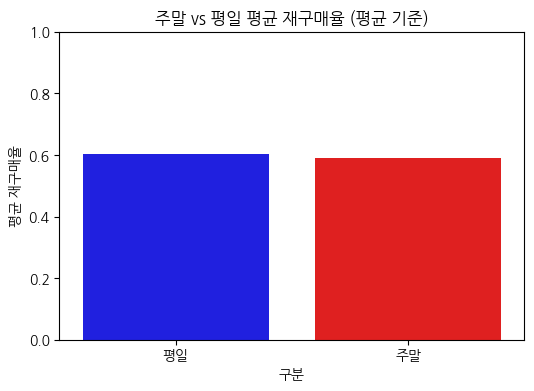

In [ ]:
# ÏãúÍ∞ÅÏ†ÅÏúºÎ°úÎäî Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏïàÎ≥¥Ïó¨ÏÑú ÌèâÍ∑†Í∏∞Ï§ÄÏúºÎ°ú Îã§Ïãú ÏãúÍ∞ÅÌôî
import seaborn as sns
import matplotlib.pyplot as plt

# Ï£ºÎßê vs ÌèâÏùº ÌèâÍ∑† Ïû¨Íµ¨Îß§Ïú® ÎπÑÍµê (ÎßâÎåÄ Í∑∏ÎûòÌîÑ)
plt.figure(figsize=(6,4))
sns.barplot(x=["ÌèâÏùº", "Ï£ºÎßê"], y=[weekday_reorder.mean(), weekend_reorder.mean()], palette=["blue", "red"])

plt.xlabel("Íµ¨Î∂Ñ")
plt.ylabel("ÌèâÍ∑† Ïû¨Íµ¨Îß§Ïú®")
plt.title("Ï£ºÎßê vs ÌèâÏùº ÌèâÍ∑† Ïû¨Íµ¨Îß§Ïú® (ÌèâÍ∑† Í∏∞Ï§Ä)")
plt.ylim(0, 1)  # Ïû¨Íµ¨Îß§Ïú® Î≤îÏúÑ 0~1
plt.show()

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Í∞Å Í∑∏Î£πÏóêÏÑú ÎûúÎç§ ÏÉòÌîåÎßÅ (Ïòà: 10,000Í∞úÏî©)
weekend_sample = f_orders[f_orders["weekend"] == 1]["avg_reorder_rate"].sample(10000, random_state=42)
weekday_sample = f_orders[f_orders["weekend"] == 0]["avg_reorder_rate"].sample(10000, random_state=42)

# Îã§Ïãú T-Í≤ÄÏ†ï ÏàòÌñâ
ttest_reorder_sampled = ttest_ind(weekend_sample, weekday_sample, equal_var=False)

print(f"T-statistic (ÏÉòÌîåÎßÅ ÌõÑ Ïû¨Íµ¨Îß§Ïú®): {ttest_reorder_sampled.statistic}, p-value: {ttest_reorder_sampled.pvalue}")

T-statistic (ÏÉòÌîåÎßÅ ÌõÑ Ïû¨Íµ¨Îß§Ïú®): -1.4626706414734247, p-value: 0.14357324590166648


üìå ÏÉòÌîåÏùÑ Ï§ÑÏù¥Î©¥ p-valueÍ∞Ä Ïª§Ïßê ‚Üí Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞Ïóê ÏùòÌï¥ Í≥ºÏû•Îêú Ìö®Í≥ºÏòÄÏùÑ Í∞ÄÎä•ÏÑ±ÎèÑ ÎÜíÏïÑ Í∏∞Í∞Å

## EDA 1 - ÏÇ¨Ïö©ÏûêÎì§Ïùò Íµ¨Îß§ Ï£ºÍ∏∞(Ïû¨Íµ¨Îß§Ìå®ÌÑ¥)ÏóêÎäî Ïñ¥Îñ§ Ìå®ÌÑ¥Ïù¥ ÏûàÏùÑÍπå?

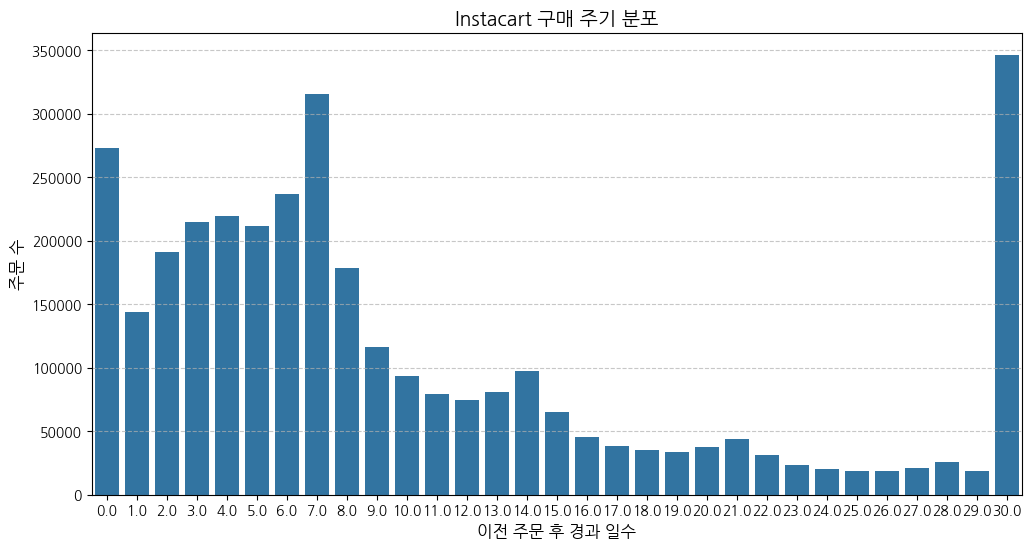

In [ ]:
# Ï†ÑÏ≤¥ Íµ¨Îß§Ï£ºÍ∏∞ Î∂ÑÌè¨
plt.figure(figsize=(12,6))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÌÇ§Ïö∞Í∏∞
sns.barplot(
    x=f_orders["days_since_prior_order"].value_counts().index,
    y=f_orders["days_since_prior_order"].value_counts().values,

)

plt.xlabel("Ïù¥Ï†Ñ Ï£ºÎ¨∏ ÌõÑ Í≤ΩÍ≥º ÏùºÏàò", fontsize=12)
plt.ylabel("Ï£ºÎ¨∏ Ïàò", fontsize=12)
plt.title("Instacart Íµ¨Îß§ Ï£ºÍ∏∞ Î∂ÑÌè¨", fontsize=14)
plt.xticks(rotation=0)  # xÏ∂ï Î†àÏù¥Î∏î Ï†ïÎ†¨
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Í∞ÄÎèÖÏÑ±ÏùÑ ÏúÑÌïú yÏ∂ï Í≤©Ïûê Ï∂îÍ∞Ä
plt.show()

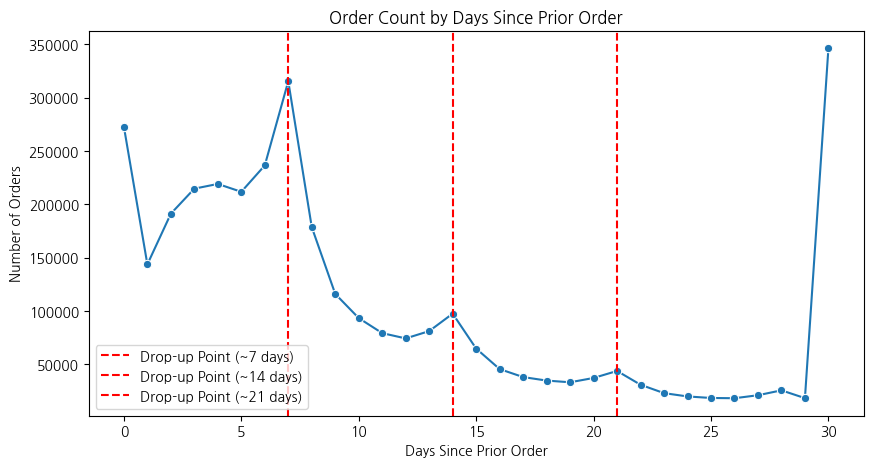

In [ ]:
# Ï¢ÄÎçî ÏûêÏÑ∏Ìûà Î≥¥Í∏∞
days_prior_counts = f_orders['days_since_prior_order'].value_counts().reset_index()
days_prior_counts.columns = ['days_since_prior_order', 'count']  # Ïª¨ÎüºÎ™Ö ÏßÄÏ†ï
days_prior_counts = days_prior_counts.sort_values(by='count', ascending=False)

days_prior_counts = f_orders['days_since_prior_order'].value_counts().reset_index()
days_prior_counts.columns = ['days_since_prior_order', 'count']
days_prior_counts = days_prior_counts.sort_values(by='days_since_prior_order')

# Line Plot (17Ïùº Ïù¥ÌõÑ Í∏âÍ∞ê Ìè¨Ïù∏Ìä∏ ÌëúÏãú)
plt.figure(figsize=(10,5))
sns.lineplot(x=days_prior_counts["days_since_prior_order"], y=days_prior_counts["count"], marker="o")
# plt.axvline(x=17, color='red', linestyle='--', label="Drop-off Point (~17 days)")
plt.axvline(x=7, color='red', linestyle='--', label="Drop-up Point (~7 days)")
plt.axvline(x=14, color='red', linestyle='--', label="Drop-up Point (~14 days)")
plt.axvline(x=21, color='red', linestyle='--', label="Drop-up Point (~21 days)")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Number of Orders")
plt.title("Order Count by Days Since Prior Order")
plt.legend()
plt.show()

- 7,14,21,30ÏùºÏóê Íµ¨Îß§Í∞Ä ÏÉÅÏäπÌïòÎäî Ìå®ÌÑ¥ÏùÑ Î≥º Ïàò ÏûàÏùå  
- Ïôú Í∑∏Îü¥Íπå??

### Ï∂îÍ∞Ä Í∞ÄÏÑ§

(1) Ï£ºÍ∞Ñ ÏáºÌïë ÏäµÍ¥Ä (Weekly Shopping Pattern)  
	‚Ä¢	ÏÇ¨ÎûåÎì§Ïù¥ ÏùºÏ†ïÌïú ÏöîÏùº(Ïòà: Ï£ºÎßê, ÏõîÏöîÏùº)Ïóê Ïû•ÏùÑ Î≥¥Îäî ÏäµÍ¥ÄÏùÑ Í∞ÄÏßà Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå.  
	‚Ä¢	ÌäπÌûà Îß§Ï£º Í∞ôÏùÄ ÏöîÏùº(Ïòà: ÌÜ†ÏöîÏùº)Ïóê Ïû•ÏùÑ Î≥∏Îã§Î©¥, Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞Í∞Ä 7Ïùº(ÎòêÎäî 14Ïùº)Î°ú ÎÇòÌÉÄÎÇ† Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº.

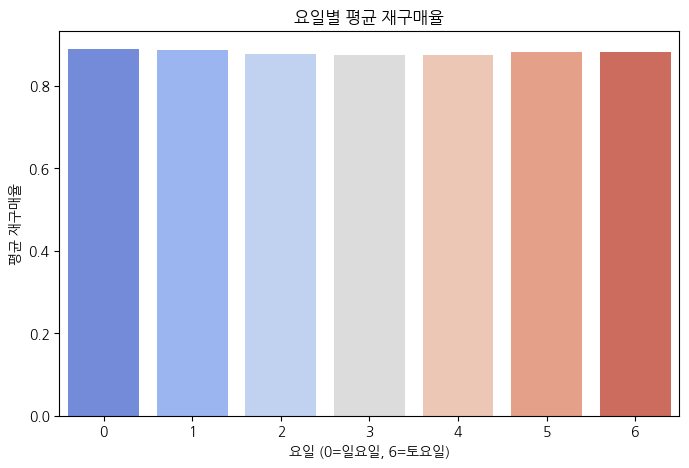

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏöîÏùºÎ≥Ñ ÌèâÍ∑† Ïû¨Íµ¨Îß§Ïú® Í≥ÑÏÇ∞
dow_reorder_rate = f_orders.groupby("order_dow")["is_reorder"].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,5))
sns.barplot(data=dow_reorder_rate, x="order_dow", y="is_reorder", palette="coolwarm")
plt.xlabel("ÏöîÏùº (0=ÏùºÏöîÏùº, 6=ÌÜ†ÏöîÏùº)")
plt.ylabel("ÌèâÍ∑† Ïû¨Íµ¨Îß§Ïú®")
plt.title("ÏöîÏùºÎ≥Ñ ÌèâÍ∑† Ïû¨Íµ¨Îß§Ïú®")
plt.show()

Ï≤´Î≤àÏß∏ Ï∂îÍ∞ÄÍ∞ÄÏÑ§ Í∏∞Í∞Å!

### Ï∂îÍ∞ÄÍ∞ÄÏÑ§ 2 : Ï†ïÍ∏∞Ï†Å Ïû•Î≥¥Í∏∞ Ìå®ÌÑ¥ (Subscription-like Shopping)  
* Instacart ÏÇ¨Ïö© Í≥†Í∞ù Ï§ë ÏùºÎ∂ÄÎäî Í≥†Ï†ïÎêú Ï£ºÍ∏∞Î°ú ÏÉùÌïÑÌíàÏùÑ Íµ¨Îß§ÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏùÑ Ïàò ÏûàÏùå.  
* ÏòàÎ•º Îì§Ïñ¥, Îß§Ï£º/Í≤©Ï£º/Ìïú Îã¨ÎßàÎã§ Ï†ïÍ∏∞Ï†ÅÏúºÎ°ú Ïû•ÏùÑ Î≥¥Îäî Í≥†Í∞ùÏù¥ ÎßéÎã§Î©¥ 7Ïùº, 14Ïùº, 30Ïùº Ï£ºÍ∏∞Í∞Ä ÏûêÏ£º ÎÇòÌÉÄÎÇ† Í≤É.   

Í≤ÄÏ¶ù Î∞©Î≤ï: Í∞úÎ≥Ñ Í≥†Í∞ùÏùò Ïû•Î≥¥Í∏∞ Ìå®ÌÑ¥ Î∂ÑÏÑù

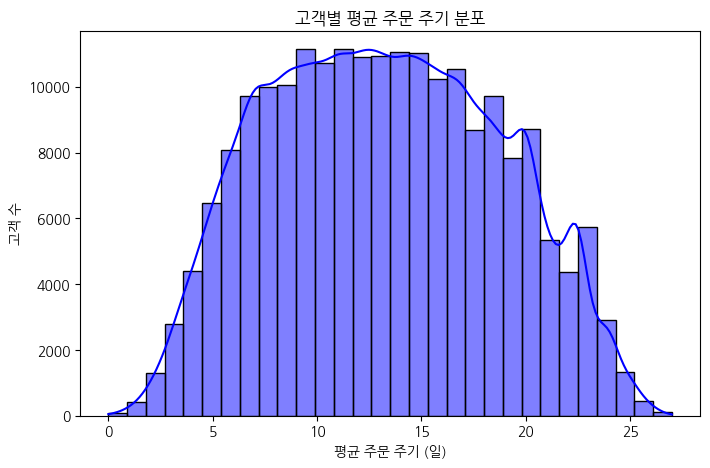

In [ ]:
# Í≥†Í∞ùÎ≥Ñ ÌèâÍ∑† Ï£ºÎ¨∏ Ï£ºÍ∏∞ Í≥ÑÏÇ∞
customer_order_cycle = f_orders.groupby("user_id")["days_since_prior_order"].mean().reset_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,5))
sns.histplot(customer_order_cycle["days_since_prior_order"], bins=30, kde=True, color="blue")
plt.xlabel("ÌèâÍ∑† Ï£ºÎ¨∏ Ï£ºÍ∏∞ (Ïùº)")
plt.ylabel("Í≥†Í∞ù Ïàò")
plt.title("Í≥†Í∞ùÎ≥Ñ ÌèâÍ∑† Ï£ºÎ¨∏ Ï£ºÍ∏∞ Î∂ÑÌè¨")
plt.show()

ÎëêÎ≤àÏß∏ Í∞ÄÏÑ§ÎèÑ Í∏∞Í∞Å..

### ÏÑ∏Î≤àÏß∏ Ï∂îÍ∞ÄÍ∞ÄÏÑ§ :Í≥†Í∞ù Í∞úÎ≥Ñ ÏàòÏ§ÄÏóêÏÑú ÌäπÏ†ï Ï£ºÍ∏∞(7Ïùº, 14Ïùº, 30Ïùº)Î°ú Î∞òÎ≥µÏ†ÅÏúºÎ°ú Ï£ºÎ¨∏ÌïòÎäî Í≥†Í∞ùÏù¥ ÎßéÏùÄÏßÄ ÌôïÏù∏

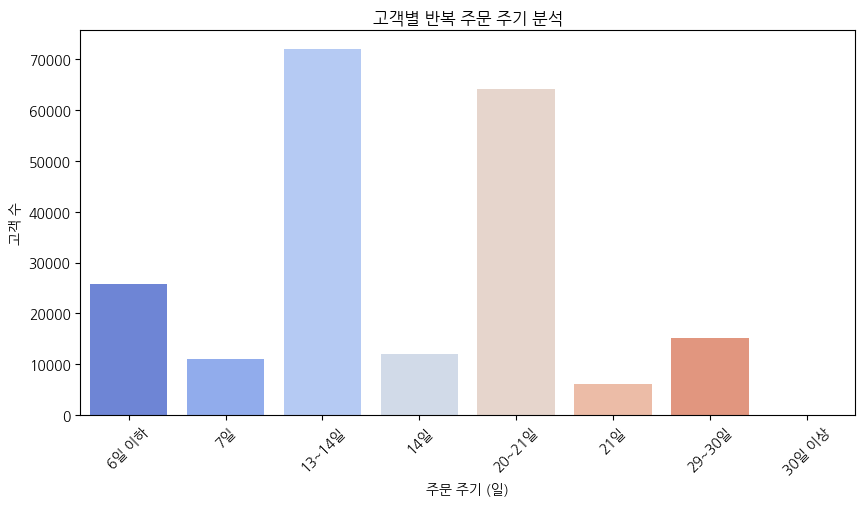

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Í≥†Í∞ùÎ≥Ñ ÌèâÍ∑† Ï£ºÎ¨∏ Ï£ºÍ∏∞ Í≥ÑÏÇ∞
customer_order_cycle = f_orders.groupby("user_id")["days_since_prior_order"].mean().reset_index()

# ÌäπÏ†ï Ï£ºÍ∏∞Î°ú Î∞òÎ≥µÌï¥ÏÑú Ï£ºÎ¨∏ÌïòÎäî Í≥†Í∞ù ÎπÑÏú® ÌôïÏù∏
bins = [0, 6.5, 7.5, 13.5, 14.5, 20.5, 21.5, 29.5, 30.5]
labels = ["6Ïùº Ïù¥Ìïò", "7Ïùº", "13~14Ïùº", "14Ïùº", "20~21Ïùº", "21Ïùº", "29~30Ïùº", "30Ïùº Ïù¥ÏÉÅ"]

customer_order_cycle["order_cycle_category"] = pd.cut(customer_order_cycle["days_since_prior_order"], bins=bins, labels=labels)

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Í≥†Í∞ù Ïàò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,5))
sns.barplot(x=customer_order_cycle["order_cycle_category"].value_counts().index,
            y=customer_order_cycle["order_cycle_category"].value_counts().values,
            palette="coolwarm")
plt.xlabel("Ï£ºÎ¨∏ Ï£ºÍ∏∞ (Ïùº)")
plt.ylabel("Í≥†Í∞ù Ïàò")
plt.title("Í≥†Í∞ùÎ≥Ñ Î∞òÎ≥µ Ï£ºÎ¨∏ Ï£ºÍ∏∞ Î∂ÑÏÑù")
plt.xticks(rotation=45)
plt.show()

- Í∞úÎ≥Ñ Í≥†Í∞ùÍµ∞Î≥ÑÎ°ú 14,21ÏùºÏóê Íµ¨Îß§ Ìå®ÌÑ¥Ïù¥ ÎÜíÏïÑÏßê!
### Ï∂îÍ∞Ä Í≤ÄÏ¶ù:  Ï£ºÍ∏∞Ï†ÅÏúºÎ°ú Î∞òÎ≥µ Íµ¨Îß§ÌïòÎäî Í≥†Í∞ùÎì§ÏùÄ Ïñ¥Îñ§ ÏÉÅÌíà/Ïπ¥ÌÖåÍ≥†Î¶¨Î•º Íµ¨Îß§Ìï†Íπå?

In [ ]:
# order - product ÏûáÎäî ÌÖåÏù¥Î∏î 'orders_product_f' Î∂àÎü¨Ïò§Í∏∞
orders_products_f = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IM/orders_products_f.csv")
orders_products_f.head(1)

order_id  product_id  add_to_cart_order  reordered      product_name  \
0         1       49302                  1          1  Bulgarian Yogurt   

   aisle_id  department_id  price   aisle  department  
0       120             16   4.42  yogurt  dairy eggs

In [ ]:
f_orders.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  cart_order_cnt  reorder_cnt  total_price  \
0                     0.0               5            0        12.06   
1                    15.0               6            3        35.37   
2                    21.0               5            3        12.06   
3                    29.0               5            5        12.06   
4                    28.0               8            5        35.37   

   max_price  total_reordered_price  is_reorder  weekend  avg_reorder_rate  
0      42.11                   0.00           0        0             0.000  
1      75.12                  32.72           1        0             0.500  
2      39.80                  23.54           1        0             0.600  
3      36.71                  36.71           1        0             1.000  
4     106.09                  66.59           1        0             0.625

- Ïù¥Î†áÍ≤å ÌäπÏ†ï Ï£ºÍ∏∞Î•º Í∞ÄÏßÑ Í≥†Í∞ùÎì§Ïù¥ ÏûêÏ£º Íµ¨Îß§ÌïòÎäî Î¨ºÌíàÏùÄ?

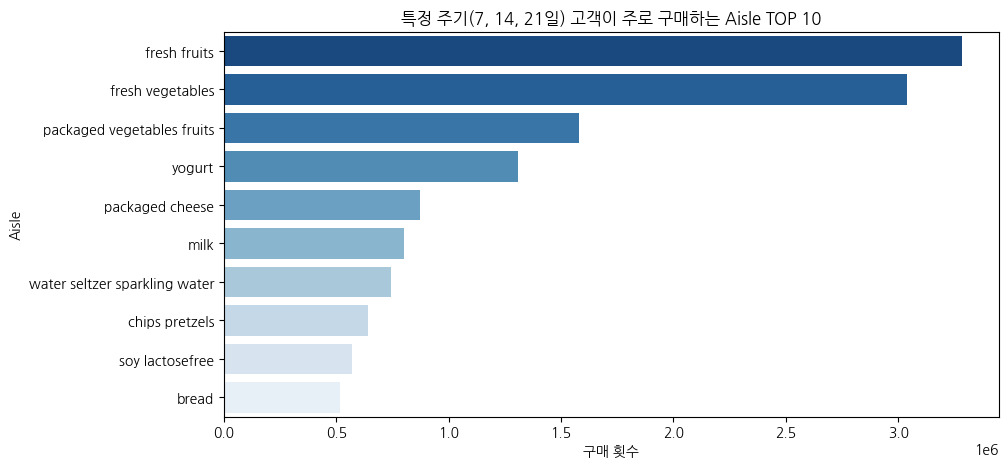

In [ ]:
# ÌäπÏ†ï Ï£ºÍ∏∞ Í≥†Í∞ùÎßå ÌïÑÌÑ∞ÎßÅ (7, 14, 21Ïùº Ï£ºÍ∏∞Î°ú Íµ¨Îß§ÌïòÎäî Í≥†Í∞ù)
selected_users = f_orders[f_orders["days_since_prior_order"].isin([7, 14, 21])]["user_id"].unique()

# ÌäπÏ†ï Ï£ºÍ∏∞ Í≥†Í∞ùÏùò order_id Í∞ÄÏ†∏Ïò§Í∏∞
selected_orders = f_orders[f_orders["user_id"].isin(selected_users)]["order_id"].unique()

# ÌäπÏ†ï Ï£ºÍ∏∞ Í≥†Í∞ùÏù¥ Íµ¨Îß§Ìïú Ï†úÌíà ÌïÑÌÑ∞ÎßÅ
selected_products = orders_products_f[orders_products_f["order_id"].isin(selected_orders)]

import matplotlib.pyplot as plt
import seaborn as sns

# ÌäπÏ†ï Ï£ºÍ∏∞ Í≥†Í∞ùÏù¥ Í∞ÄÏû• ÎßéÏù¥ Íµ¨Îß§Ìïú aisle ÏßëÍ≥Ñ
aisle_counts = selected_products["aisle"].value_counts().reset_index()
aisle_counts.columns = ["aisle", "count"]

# ÏÉÅÏúÑ 10Í∞ú aisle ÏãúÍ∞ÅÌôî
top_aisles = aisle_counts.head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_aisles, x="count", y="aisle", palette="Blues_r")
plt.xlabel("Íµ¨Îß§ ÌöüÏàò")
plt.ylabel("Aisle")
plt.title("ÌäπÏ†ï Ï£ºÍ∏∞(7, 14, 21Ïùº) Í≥†Í∞ùÏù¥ Ï£ºÎ°ú Íµ¨Îß§ÌïòÎäî Aisle TOP 10")
plt.show()

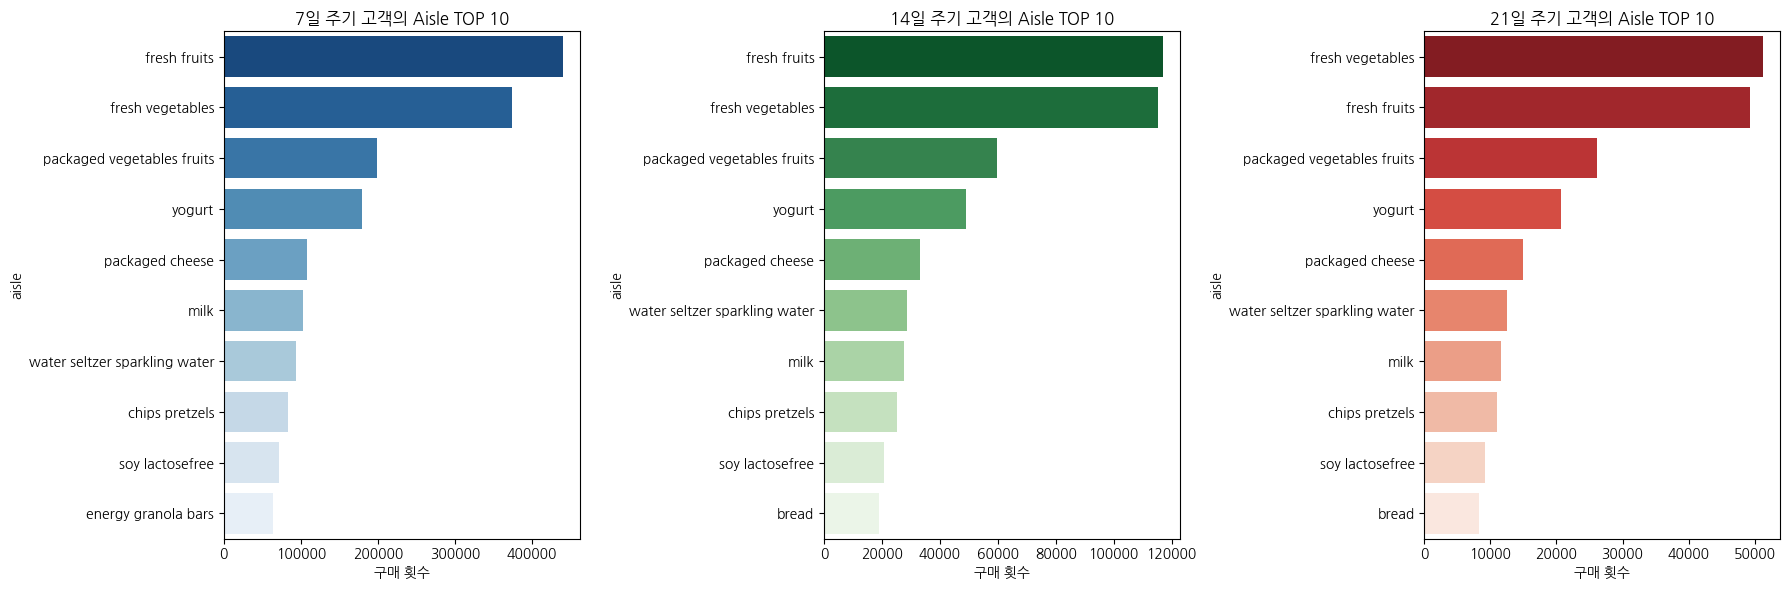

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Í≥†Í∞ù Ï£ºÍ∏∞Î≥Ñ order_id Ï∂îÏ∂ú
orders_7d = f_orders[f_orders["days_since_prior_order"] == 7]["order_id"].unique()
orders_14d = f_orders[f_orders["days_since_prior_order"] == 14]["order_id"].unique()
orders_21d = f_orders[f_orders["days_since_prior_order"] == 21]["order_id"].unique()

# Í∞Å Í≥†Í∞ùÍµ∞Ïùò Ï£ºÎ¨∏ ÏÉÅÌíà ÌïÑÌÑ∞ÎßÅ
products_7d = orders_products_f[orders_products_f["order_id"].isin(orders_7d)]
products_14d = orders_products_f[orders_products_f["order_id"].isin(orders_14d)]
products_21d = orders_products_f[orders_products_f["order_id"].isin(orders_21d)]

# Í∞Å Í≥†Í∞ùÍµ∞Î≥Ñ aisle(ÏÜåÎ∂ÑÎ•ò)Î≥Ñ Ï£ºÎ¨∏Îüâ ÏßëÍ≥Ñ
aisle_counts_7d = products_7d["aisle"].value_counts().reset_index().head(10)
aisle_counts_14d = products_14d["aisle"].value_counts().reset_index().head(10)
aisle_counts_21d = products_21d["aisle"].value_counts().reset_index().head(10)

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.barplot(data=aisle_counts_7d, x="count", y="aisle", palette="Blues_r", ax=axes[0])
axes[0].set_title("7Ïùº Ï£ºÍ∏∞ Í≥†Í∞ùÏùò Aisle TOP 10")
axes[0].set_xlabel("Íµ¨Îß§ ÌöüÏàò")

sns.barplot(data=aisle_counts_14d, x="count", y="aisle", palette="Greens_r", ax=axes[1])
axes[1].set_title("14Ïùº Ï£ºÍ∏∞ Í≥†Í∞ùÏùò Aisle TOP 10")
axes[1].set_xlabel("Íµ¨Îß§ ÌöüÏàò")

sns.barplot(data=aisle_counts_21d, x="count", y="aisle", palette="Reds_r", ax=axes[2])
axes[2].set_title("21Ïùº Ï£ºÍ∏∞ Í≥†Í∞ùÏùò Aisle TOP 10")
axes[2].set_xlabel("Íµ¨Îß§ ÌöüÏàò")

plt.tight_layout()
plt.show()

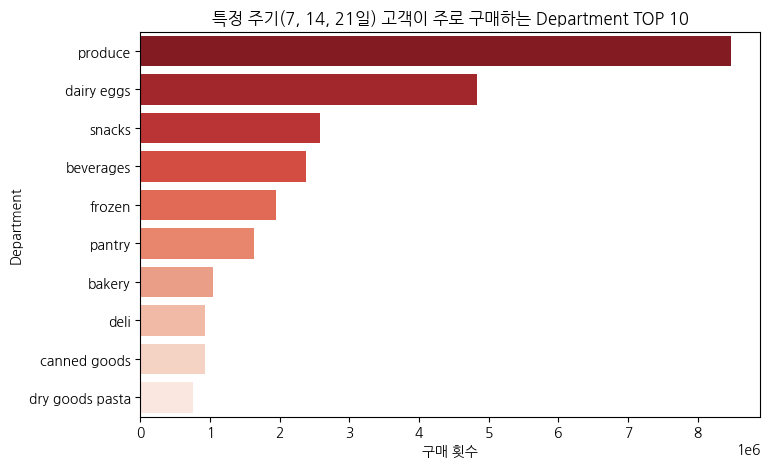

In [ ]:
# ÌäπÏ†ï Ï£ºÍ∏∞ Í≥†Í∞ùÏù¥ Í∞ÄÏû• ÎßéÏù¥ Íµ¨Îß§Ìïú department ÏßëÍ≥Ñ
department_counts = selected_products["department"].value_counts().reset_index()
department_counts.columns = ["department", "count"]

# ÏÉÅÏúÑ 10Í∞ú department ÏãúÍ∞ÅÌôî
top_departments = department_counts.head(10)

plt.figure(figsize=(8,5))
sns.barplot(data=top_departments, x="count", y="department", palette="Reds_r")
plt.xlabel("Íµ¨Îß§ ÌöüÏàò")
plt.ylabel("Department")
plt.title("ÌäπÏ†ï Ï£ºÍ∏∞(7, 14, 21Ïùº) Í≥†Í∞ùÏù¥ Ï£ºÎ°ú Íµ¨Îß§ÌïòÎäî Department TOP 10")
plt.show()

- Ï∂îÍ∞ÄÎ°ú ÌôïÏù∏ÌïòÎ©¥ Ï¢ãÏùÑ Í≤ÉÎì§
1. InstacartÏùò ÎßàÏºÄÌåÖ ÌôúÎèôÏù¥ ÌäπÏ†ï Ï£ºÍ∏∞Ïóê ÏòÅÌñ•ÏùÑ Ï£ºÎäîÏßÄ Í≤ÄÌÜ†
2. Ï†ïÍ∏∞Íµ¨Îß§ ÏÉÅÌíàÏù¥ ÏûàÎäîÏßÄ Í≤ÄÌÜ†


## EDA 2 - ÌäπÎ≥ÑÌûà Ïûò(ÏüàÏ£º,ÎßéÏù¥) ÌåîÎ¶¨Îäî Ïπ¥ÌÖåÍ≥†Î¶¨/ aisle/ ÌîÑÎ°úÎçïÌä∏Í∞Ä ÏûàÏùÑÍπå?  

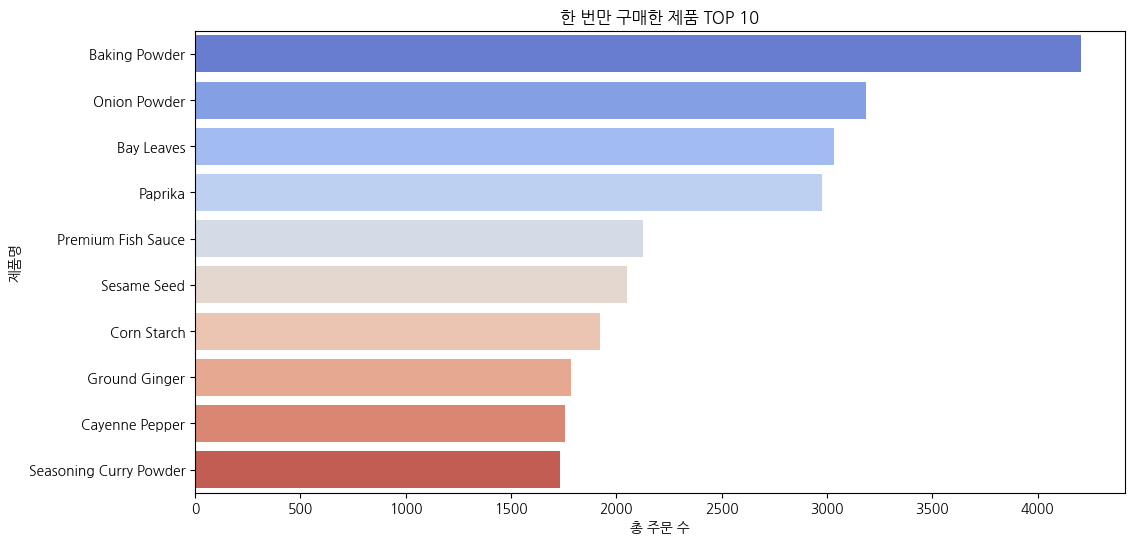

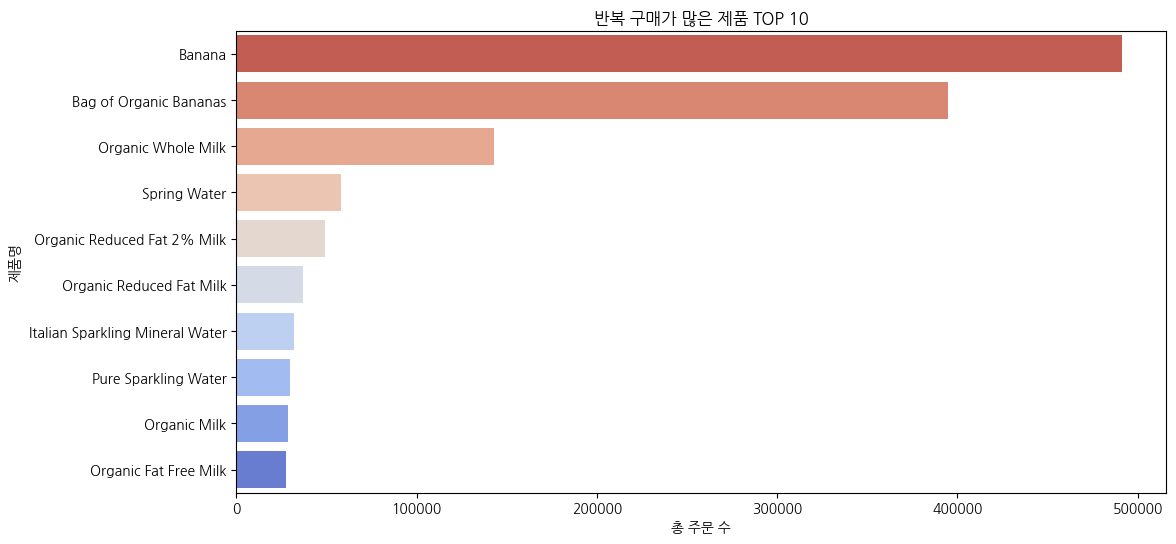

In [ ]:
# Ï†úÌíàÎ≥Ñ Ïû¨Íµ¨Îß§ ÌöüÏàò Î∞è Ïû¨Íµ¨Îß§Ïú® Í≥ÑÏÇ∞
product_reorder_analysis = orders_products_f.groupby("product_name").agg(
    total_orders=("order_id", "count"),
    reorder_count=("reordered", "sum"),
    reorder_ratio=("reordered", "mean")
).reset_index()

# Ìïú Î≤àÎßå Íµ¨Îß§ÌïòÍ≥† ÎÅùÎÇú Ï†úÌíà (Ïû¨Íµ¨Îß§Ïú® 10% ÎØ∏Îßå, 50Ìöå Ïù¥ÏÉÅ ÌåîÎ¶∞ Ï†úÌíà)
one_time_products = product_reorder_analysis[(product_reorder_analysis["reorder_ratio"] < 0.1) &
                                             (product_reorder_analysis["total_orders"] > 50)]

# Î∞òÎ≥µ Íµ¨Îß§ Ï†úÌíà (Ïû¨Íµ¨Îß§Ïú® 80% Ïù¥ÏÉÅ, 50Ìöå Ïù¥ÏÉÅ ÌåîÎ¶∞ Ï†úÌíà)
high_reorder_products = product_reorder_analysis[(product_reorder_analysis["reorder_ratio"] > 0.8) &
                                                 (product_reorder_analysis["total_orders"] > 50)]

# Ìïú Î≤àÎßå Íµ¨Îß§Ìïú Ï†úÌíà ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.barplot(data=one_time_products.sort_values(by="total_orders", ascending=False).head(10),
            x="total_orders", y="product_name", palette="coolwarm")
plt.xlabel("Ï¥ù Ï£ºÎ¨∏ Ïàò")
plt.ylabel("Ï†úÌíàÎ™Ö")
plt.title("Ìïú Î≤àÎßå Íµ¨Îß§Ìïú Ï†úÌíà TOP 10")
plt.show()

# Î∞òÎ≥µ Íµ¨Îß§Í∞Ä ÎßéÏùÄ Ï†úÌíà ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.barplot(data=high_reorder_products.sort_values(by="total_orders", ascending=False).head(10),
            x="total_orders", y="product_name", palette="coolwarm_r")
plt.xlabel("Ï¥ù Ï£ºÎ¨∏ Ïàò")
plt.ylabel("Ï†úÌíàÎ™Ö")
plt.title("Î∞òÎ≥µ Íµ¨Îß§Í∞Ä ÎßéÏùÄ Ï†úÌíà TOP 10")
plt.show()

# Users Í∏∞Î∞ò EDA

### 1. Ï¥ù Ï£ºÎ¨∏ ÌöüÏàò(frequency)Í∞Ä ÎÜíÏùÄ Í≥†Í∞ùÏùÄ ÌèâÍ∑† Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞(avg_days_since_prior_order)Í∞Ä ÏßßÏùÑ Í≤ÉÏù¥Îã§.

                                    Hypothesis  Pearson Correlation  p-value
0  H7: frequency vs avg_days_since_prior_order             -0.51814      0.0


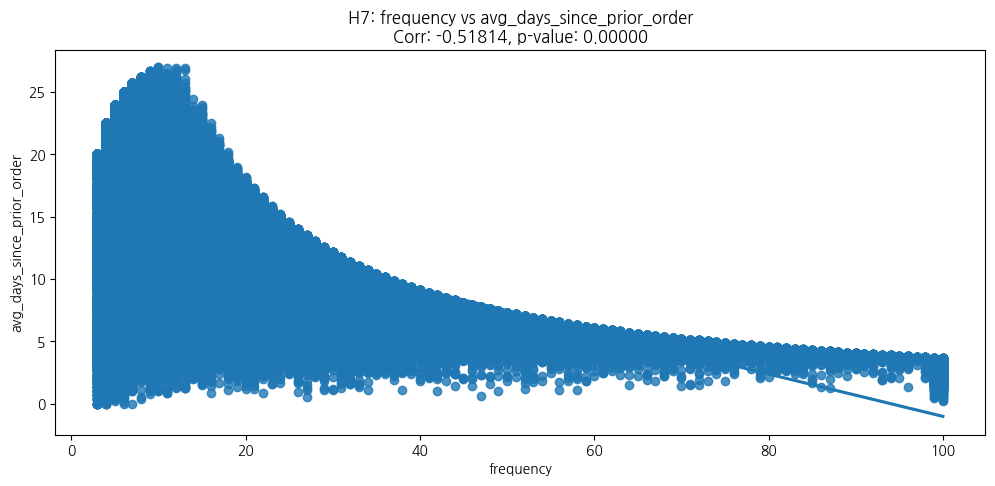

In [ ]:

from scipy.stats import pearsonr

# Ï¥ù Ï£ºÎ¨∏ ÌöüÏàò(frequency)ÏôÄ ÌèâÍ∑† Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞(avg_days_since_prior_order)Ïùò Í¥ÄÍ≥Ñ
corr_h7, p_value_h7 = pearsonr(users["frequency"], users["avg_days_since_prior_order"])

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ± (p-valueÎ•º ÏÜåÏàòÏ†ê 5ÏûêÎ¶¨ÍπåÏßÄ Î∞òÏò¨Î¶º)
correlation_results_h7 = pd.DataFrame({
    "Hypothesis": ["H7: frequency vs avg_days_since_prior_order"],
    "Pearson Correlation": [round(corr_h7, 5)],
    "p-value": [round(p_value_h7, 5)]
})

# Correlation Í≤∞Í≥º Ï∂úÎ†•
print(correlation_results_h7)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))
sns.regplot(x=users["frequency"], y=users["avg_days_since_prior_order"])
plt.title(f"H7: frequency vs avg_days_since_prior_order\nCorr: {corr_h7:.5f}, p-value: {p_value_h7:.5f}")
plt.show()


Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥Ñ

### 2. Ï¥ùÏ£ºÎ¨∏ÌöüÏàò(frequency)Í∞Ä ÎßéÏùÑÏàòÎ°ù ÌèâÍ∑† Ïû¨Íµ¨Îß§ ÌíàÎ™© Ïàò(avg_reorder_cnt)Í∞Ä Ï¶ùÍ∞Ä Ìï†Í≤ÉÏù¥Îã§.

ÌöåÍ∑Ä Í≥ÑÏàò (Í∏∞Ïö∏Í∏∞): 0.08113
Ï†àÌé∏: 3.25932


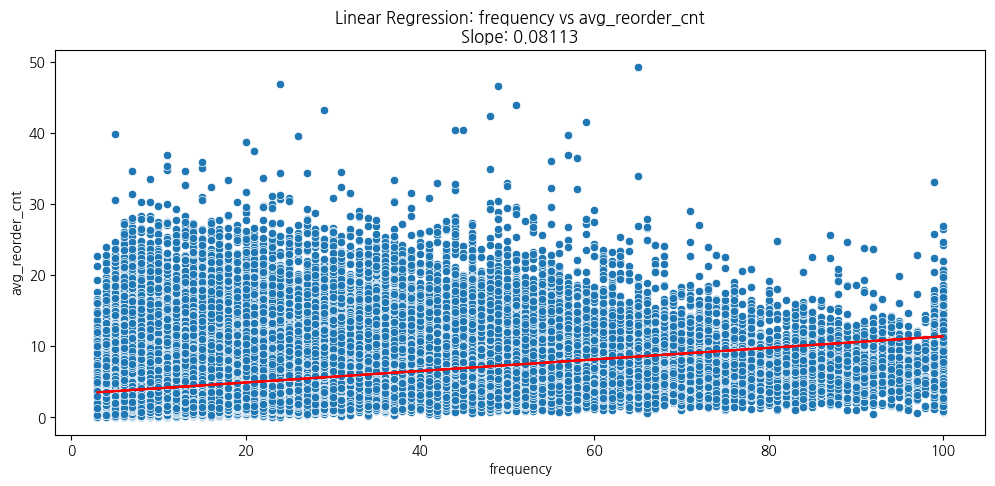

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = users["frequency"].values.reshape(-1, 1)
y = users["avg_reorder_cnt"].values

# ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
model = LinearRegression()
model.fit(X, y)

# Í∏∞Ïö∏Í∏∞(ÌöåÍ∑Ä Í≥ÑÏàò)ÏôÄ Ï†àÌé∏ ÌôïÏù∏
slope = model.coef_[0]
intercept = model.intercept_

print(f"ÌöåÍ∑Ä Í≥ÑÏàò (Í∏∞Ïö∏Í∏∞): {slope:.5f}")
print(f"Ï†àÌé∏: {intercept:.5f}")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))
sns.scatterplot(x=users["frequency"], y=users["avg_reorder_cnt"])
plt.plot(users["frequency"], model.predict(X), color="red")  # ÌöåÍ∑ÄÏÑ† Ï∂îÍ∞Ä
plt.title(f"Linear Regression: frequency vs avg_reorder_cnt\nSlope: {slope:.5f}")
plt.show()

ÏÑ†ÌòïÏÑ±Ïù¥ Î∞úÍ≤¨ÎêòÏóàÎã§!